In [2]:
import MICSAS.interface as misim
from CASS_Driver import drive_tree

# Compute GNN feature vectors for each function

In [3]:
cass_manager = misim.CASSManager()
gnn_preprocessor = misim.GNNPreprocessor('MICSAS/data/datasets/poj/dataset-gnn/vocab.pkl')
gnn_runner = misim.GNNRunner('MICSAS/data/datasets/poj/dataset-gnn/vocab.pkl', 'MICSAS/data/models/poj/gnn/model.pt')

# Compute GNN feature vectors for each function/loop in a source file.
cass_strs = drive_tree(input_file='test_codes/input_code_8.c')
#cass_strs = ['1,0,10,1\t34\tS#FS#1_1\tI#compound_statement#{$}\t1\tI#if_statement#if$$$\t3\tI#condition_clause#($)\t1\tI#binary_expression#$<$\t2\tvn\t-1\t15\tN0\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tN-1\tI#else_clause#else$\t1\tI#if_statement#if$$$\t3\tI#condition_clause#($)\t1\tI#binary_expression#$||$\t2\tI#binary_expression#$==$\t2\tvn\t5\t18\tN0\tI#binary_expression#$==$\t2\tvn\t15\t27\tN1\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tN1\tI#else_clause#else$\t1\tI#compound_statement#{$}\t1\tI#return_statement#return$;\t1\tI#binary_expression#$*$\t2\tvn\t18\t32\tI#call_expression#$$\t2\tFfactorial\tI#argument_list#($)\t1\tI#binary_expression#$-$\t2\tvn\t27\t-1\tN1\t']
#cass_strs = cass_manager.extract_cass_strs_from_src_file('input_code_ez.c', extract_loops=True)
casses, src_ranges = cass_manager.load_casses_from_strs(cass_strs)
inputs = gnn_preprocessor.preprocess_casses_seperated(casses)
vectors = gnn_runner.compute_code_vector_batched(inputs)
print (cass_strs)
for i in range(len(src_ranges)):
     print(src_ranges[i], vectors[i])



['0,0,7,1\t32\tS#FS#1_0\tI#compound_statement#{$$$$$$$$$$$}\t11\tI#expression_statement#$;\t1\tI#assignment_expression#$=$\t2\tVx\tVthis\tI#expression_statement#$;\t1\tVcass\tI#expression_statement#$;\t1\tVlogi\tI#expression_statement#$;\t1\tVwas\tI#expression_statement#$;\t1\tVvery\tI#expression_statement#$;\t1\tVhard\tI#expression_statement#$;\t1\tVto\tI#expression_statement#$;\t1\tVimplement\tI#declaration#int$;\t1\tI#init_declarator#$=$\t2\tvtotal\t-1\t29\tN25\tI#expression_statement#$;\t1\tI#assignment_expression#$=$\t2\tVstring\tI#binary_expression#$+$\t2\tVx\tvtotal\t22\t-1\tI#return_statement#return$;\t1\tVstring\t']
SourceRange(start_line=0, start_column=0, end_line=7, end_column=1) [-4.1294155  -5.211907    3.0889378   5.3393927  -5.6841416   1.2497337
  2.4063818  -9.08663     2.2093687   1.892722   -1.1380143   1.1616006
 -1.5419241  -0.20270327 -0.07288193 -3.4492426  -4.0413427   4.779633
 -5.629128   -2.9557533   1.4416361  -2.5284693   1.2146845   4.0458913
 -6.9593687 

line 2:8 token recognition error at: '''
line 2:14 missing ';' at 'cass'
line 2:19 missing ';' at 'logi'
line 2:24 missing ';' at 'was'
line 2:28 missing ';' at 'very'
line 2:33 missing ';' at 'hard'
line 2:38 missing ';' at 'to'
line 2:50 token recognition error at: '''
line 2:41 missing ';' at 'implement'
line 3:4 missing ';' at 'int'
line 5:4 missing ';' at 'return'
line 8:0 missing ';' at '}'


# Compute code similarity between two source files.


In [4]:
# Compute code similarity between two source files.
cass_strs_1 = drive_tree(input_file='test_codes/input_code_1.c')
cass_strs_2 = drive_tree(input_file='test_codes/input_code_2.c')
casses_1, _ = cass_manager.load_casses_from_strs(cass_strs_1)
casses_2, _ = cass_manager.load_casses_from_strs(cass_strs_2)
input_1 = gnn_preprocessor.preprocess_casses_combined(casses_1)
input_2 = gnn_preprocessor.preprocess_casses_combined(casses_2)
vectors = gnn_runner.compute_code_vector_batched([input_1, input_2])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.8808798


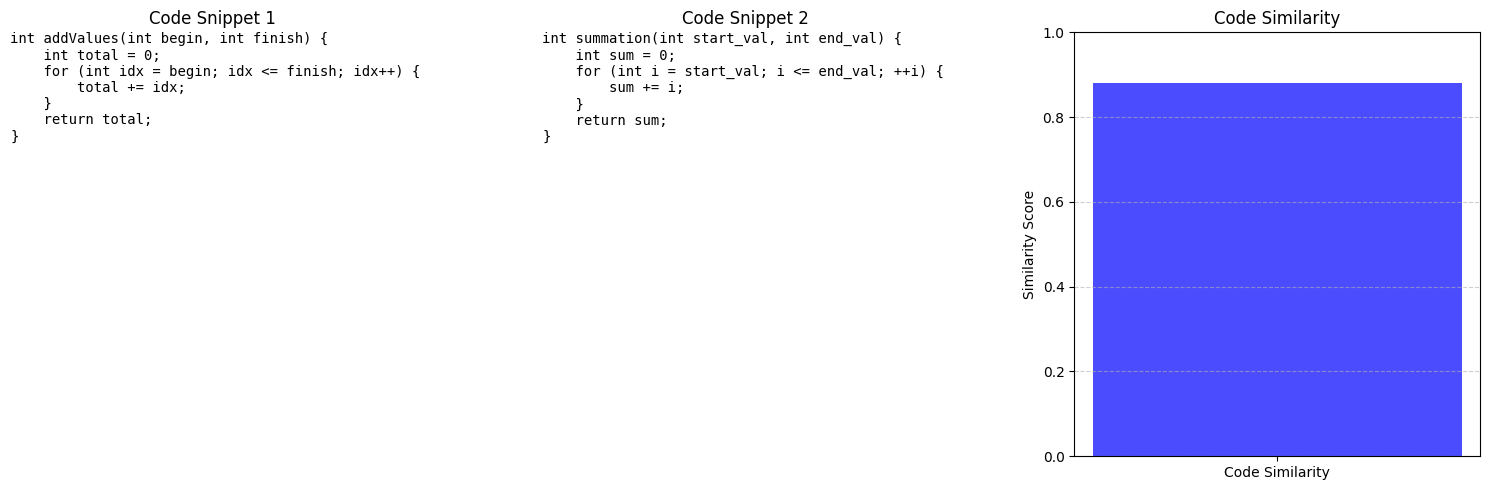

In [5]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_1.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_2.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()


In [6]:
# Compute code similarity between two source files.
cass_strs_3 = drive_tree(input_file='test_codes/input_code_3.c')
cass_strs_4 = drive_tree(input_file='test_codes/input_code_4.c')
casses_3, _ = cass_manager.load_casses_from_strs(cass_strs_3)
casses_4, _ = cass_manager.load_casses_from_strs(cass_strs_4)
input_3 = gnn_preprocessor.preprocess_casses_combined(casses_3)
input_4 = gnn_preprocessor.preprocess_casses_combined(casses_4)
vectors = gnn_runner.compute_code_vector_batched([input_3, input_4])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.8952268


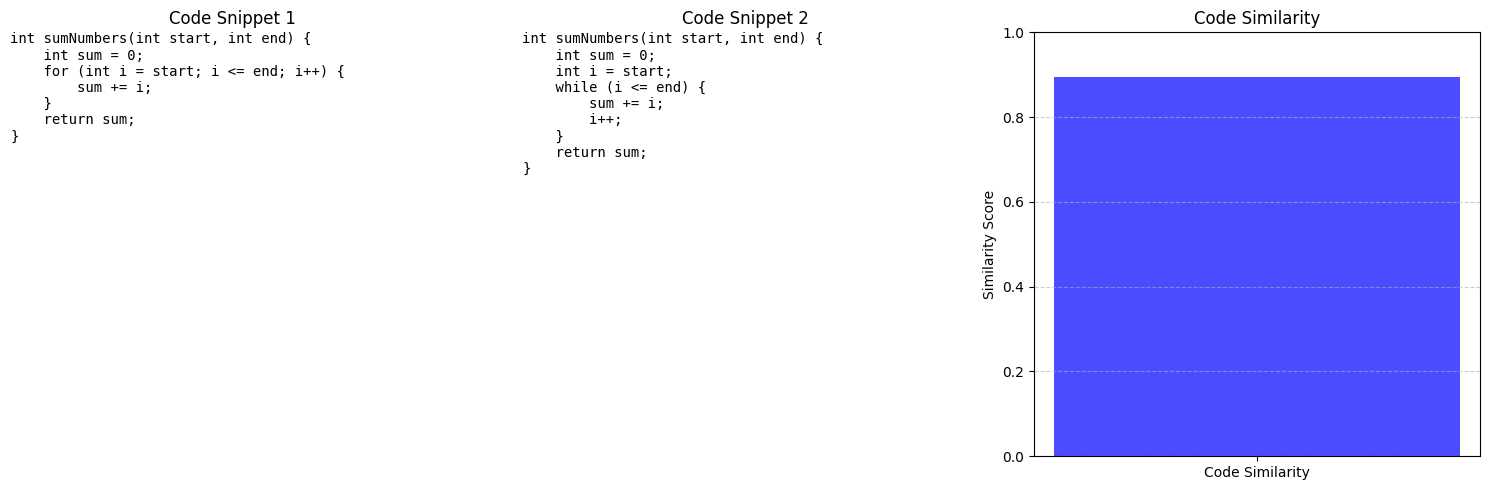

In [7]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_3.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_4.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()


In [25]:
cass_strs_5 = drive_tree(input_file='test_codes/input_code_5.c')
cass_strs_6 = drive_tree(input_file='test_codes/input_code_6.c')
casses_5, _ = cass_manager.load_casses_from_strs(cass_strs_5)
casses_6, _ = cass_manager.load_casses_from_strs(cass_strs_6)
input_5 = gnn_preprocessor.preprocess_casses_combined(casses_5)
input_6 = gnn_preprocessor.preprocess_casses_combined(casses_6)
vectors = gnn_runner.compute_code_vector_batched([input_5, input_6])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.7181637


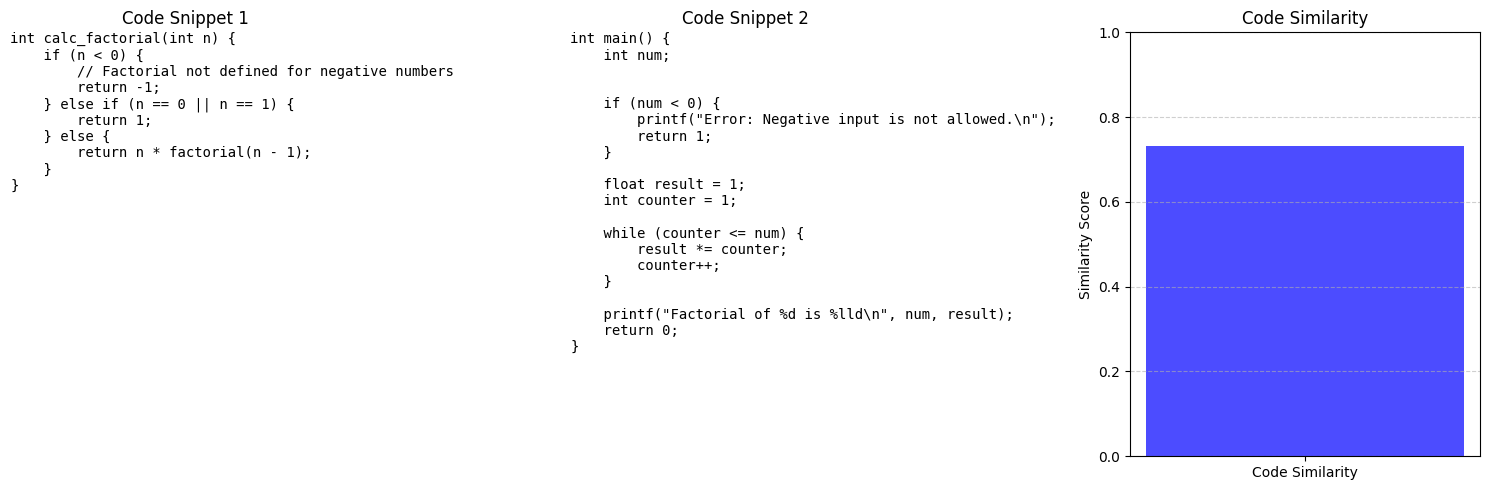

In [9]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_5.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_6.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()

In [37]:
cass_strs_7 = drive_tree(input_file='test_codes/input_code_7.c')
cass_strs_8 = drive_tree(input_file='test_codes/input_code_8.c')
casses_7, _ = cass_manager.load_casses_from_strs(cass_strs_7)
casses_8, _ = cass_manager.load_casses_from_strs(cass_strs_8)
input_7 = gnn_preprocessor.preprocess_casses_combined(casses_7)
input_8 = gnn_preprocessor.preprocess_casses_combined(casses_8)
vectors = gnn_runner.compute_code_vector_batched([input_7, input_8])
from numpy.linalg import norm
similarity = (vectors[0] @ vectors[1].T) / (norm(vectors[0]) * norm(vectors[1]))
print(similarity)


0.6534402


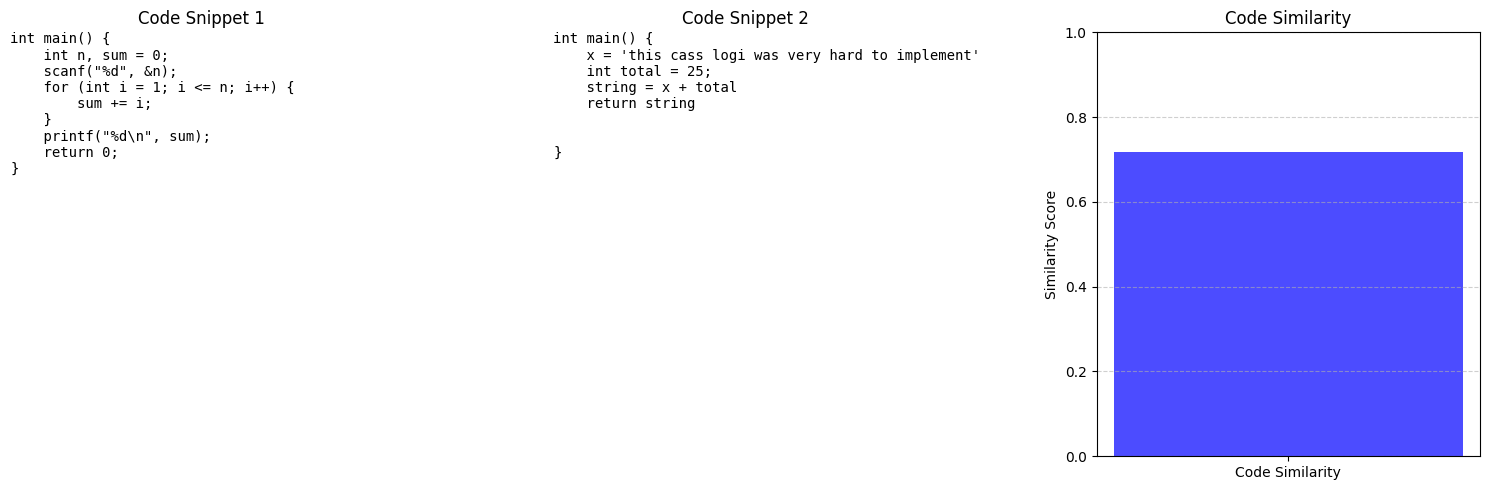

In [11]:
import matplotlib.pyplot as plt

# Paths to the two code files
file_1_path = "test_codes/input_code_7.c"  # Update with your actual file path
file_2_path = "test_codes/input_code_8.c"  # Update with your actual file path

# Read the content of both files
with open(file_1_path, "r") as f1:
    code_snippet_1 = f1.read()

with open(file_2_path, "r") as f2:
    code_snippet_2 = f2.read()

# Create figure with 1 row, 3 columns (Two code snippets + Similarity bar)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Code Snippet 1
axes[0].text(0, 1, code_snippet_1, fontsize=10, family='monospace', verticalalignment='top')
axes[0].axis("off")  # Hide axes
axes[0].set_title("Code Snippet 1")

# Display Code Snippet 2
axes[1].text(0, 1, code_snippet_2, fontsize=10, family='monospace', verticalalignment='top')
axes[1].axis("off")  # Hide axes
axes[1].set_title("Code Snippet 2")

# Plot Similarity Score
axes[2].bar(["Code Similarity"], [similarity], color='blue', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("Similarity Score")
axes[2].set_title("Code Similarity")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to fit text properly
plt.tight_layout()
plt.show()